<div style="width:100%;border-collapse:separate;border:solid 2px;border-radius:14px;">
    <div style="display:flex;">
        <div style="display:inline;width:5%;"></div>
        <div style="display:inline;width:15%;">NSIT</div>
        <div style="display:inline;width:15%;">15a</div>
        <div style="display:inline;width:70%;text-align:right;"><b>Architectures matérielles, systèmes d’exploitation et réseaux</b></div>
        <div style="display:inline;width:5%;"></div>
    </div>
    <div  style="display: flex;background-color:#EEE">
        <p style="width:100%;text-align:center;">Sécurisation des communications</p>
    </div>
    <div  style="display: flex;">
        <p style="width:100%;text-align:center;">Casser un pseudo-RSA</p>
    </div>
</div>

<div class = "alert alert-success">
    
**Objectifs de la séquence:** 
    
- Prinicpe de base du chiffrement RSA
- Générer des clefs publiques et privées d'un chiffrement asymétrique
- Retrouver la clef privée à partir de la clef publique: Casser le chiffrement
</div>

![RSA](https://github.com/ebuonocore/NSIT_15_securisation_communication/blob/main/sources/NSIT_15_cadenas.png?raw=true)
<span style="font-family:Comic Sans MS; color:gray; font-size: x-small;float:right ">Source: Cadenas d'après freepng.com</span> 

<div class = "alert alert-info">
    
**Sommaire :**
- <a href=#rappels>Petits rappels:</a> Modulo, nombres premiers, premiers entre eux
- <a href=#principe>Principe de fonctionnement du RSA</a> 
- <a href=#implementation>Implémentation</a> 
- <a href=#premier_hack>Premier test d'attaque</a> 
- <a href=#generalisation>Généralisation du cassage</a> 
- <a href=#limites>Limites de l'exercice</a> 

<div id="rappels"></div>

# Petits rappels

Le chiffrement RSA repose sur l'**arithmétique modulaire** (calculs basés sur l'opération **modulo**) et la reherche de **primalité** (recherche de nombres premiers, factorisation).  

<div class = "alert alert-success">
Le <b>modulo</b> est une opération qui au couple (a, b) d'entiers, associe le <b>reste</b> de la <b>division euclidienne</b> de a par b.

<table style="border:solid 1px;">
    <tr>
        <td style="border:solid 1px;"><b>N</b></td>
        <td style="border:solid 1px;">0</td>
        <td style="border:solid 1px;">1</td>
        <td style="border:solid 1px;">2</td>
        <td style="border:solid 1px;">3</td>
        <td style="border:solid 1px;">4</td>
        <td style="border:solid 1px;">5</td>
        <td style="border:solid 1px;">6</td>
        <td style="border:solid 1px;">7</td>
        <td style="border:solid 1px;">8</td>
        <td style="border:solid 1px;">9</td>
        <td style="border:solid 1px;">10</td>
    </tr>
    <tr>
        <td style="border:solid 1px;"><b>N%3</b></td>
        <td style="border:solid 1px;">0</td>
        <td style="border:solid 1px;">1</td>
        <td style="border:solid 1px;">2</td>
        <td style="border:solid 1px;">0</td>
        <td style="border:solid 1px;">1</td>
        <td style="border:solid 1px;">2</td>
        <td style="border:solid 1px;">0</td>
        <td style="border:solid 1px;">1</td>
        <td style="border:solid 1px;">2</td>
        <td style="border:solid 1px;">0</td>
        <td style="border:solid 1px;">1</td>
    </tr>
</table>

In [ ]:
7%3

<div class = "alert alert-success">
<b>Nombre premier:</b> qui ne peut être divisé que par lui-même et par 1. 

Ecrire une fonction <code>tester_premier(x)</code> qui renvoie <code>True</code> si un nombre x est premier.  
Note: Dans un premier temps on tester les restes des divisions euclidiennes de x avec tous les nombres compris entre 2 et (x-1)

In [5]:
def tester_premier(x:int)->bool:
    """ Renvoie True si x est un nombre premier. Sinon, renvoie False.
    """
    assert x >= 2, "Le nombre testé doit être supérieur à 1"
    test = True
    for i in range (2, x):
        if x%i == 0: # J'ai trouvé un nombre i qui divise x
            test = False # x n'est donc pas un nombre entier
            break 
    return test

# Affiche la suite des nombres premiers inférieurs à 80
print("Liste des nombres premiers inférieurs à 80:\n [1", end="")
for N in range(2,80):
    if tester_premier(N):
        print(",", N, end="")
print("]")

Liste des nombres premiers inférieurs à 80:
 [1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79]


<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x2705; Correction (sans optimisation)</summary>
<code>
def tester_premier(x:int)->bool:
    """ Renvoie True si x est un nombre premier. Sinon, renvoie False.
    """
    assert x >= 2, "Le nombre testé doit être supérieur à 1"
    test = True
    for i in range (2, x):
        if x%i == 0: # J'ai trouvé un nombre i qui divise x
            test = False # x n'est donc pas un nombre entier
            break 
    return test
</code>
</details>

<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x1F6E0; Optimisations</summary>
On peut accélérer la recherche en s'arrêtant à la racine de x, inutile d'aller plus loin.<br>
De même, on peut tester la divisibilité par 2 puis sauter tous les nombres paires.<br>
On peut aussi faire appel aux <a href="https://fr.wikipedia.org/wiki/Crible_d%27%C3%89ratosth%C3%A8ne">cribles Ératosthène</a> ou son amélioration, le <a href="https://fr.wikipedia.org/wiki/Crible_d%27Atkin">crible d'Atkin</a>.
</details>

<div class = "alert alert-success">
<b>Nombres premiers entre eux:</b> Deux nombres entiers sont dits premiers entre eux lorsqu'il n'admette aucun diviseur commun, sinon l'unité.<br>Par exemple 14 et 15 sont premiers entre eux, mais pas 12 et 15 qui admettent 3 comme diviseur commun.

Le code suivant permet de calculer le plus grand commun diviseur entre deux nombres a et b.   
Faites des tests.

In [ ]:
def pgcd(a,b):
    """Renvoie le pgcd de a et b."""
    while b:
        a, b = b, a%b
    return a

pgcd(12,15)

**Q1-** Que doit renvoyer cette fonction si deux nombres sont premiers entre eux? 

...

<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x1F511; Aide</summary>
Faites des tests:<br>
<code>pgcd(12,15)</code><br>
<code>pgcd(14,15)</code><br>
<code>pgcd(20,30)</code><br>
<code>pgcd(9,49)</code><br>
</details>

<div id="principe"></div>

# Principe de fonctionnement du RSA

Bob doit envoyer un message à Alice.  
**Etape 1:** Alice génère deux clefs dont les paramtres sont liés mathématiquement.  
Nous les désigneront par deux couples d'entiers ($e$,$n$) pour la <span style="color: #00aa00;">**clef publique**</span> et ($d$,$n$) pour la <span style="color: #aa0000;">**clef privée**</span>.  
Où $e$ et $d$ sont deux nombres a priori différents, mais $n$ désigne bien le même nombre dans les deux clefs.

![Génération_des_clefs](https://github.com/ebuonocore/NSIT_15_securisation_communication/blob/main/a_casser_un_pseudo_RSA/images/NSIT_15a_RSA_1.png?raw=true)

**Etape 2:** Alice diffuse sa clef à Bob sur un canal **non sécurisé** (a priori, tout le monde peut la voir)

![Génération_des_clefs](https://github.com/ebuonocore/NSIT_15_securisation_communication/blob/main/a_casser_un_pseudo_RSA/images/NSIT_15a_RSA_2.png?raw=true)

**Etape 3:** Maintenant, Bob effectue le chiffrement de son message grâce à la <span style="color: #00aa00;">**clef publique**</span> d'Alice.  
Là, même avec sa <span style="color: #00aa00;">**clef publique**</span>, Bob ne pourra plus déchiffrer le message qu'il vient de générer.

![Génération_des_clefs](https://github.com/ebuonocore/NSIT_15_securisation_communication/blob/main/a_casser_un_pseudo_RSA/images/NSIT_15a_RSA_3.png?raw=true)

**Etape 4:** Il transmet ce message chiffré à Alice qui va pouvoir effectuer l'opération de déchiffrement.  
Seule sa <span style="color: #aa0000;">**clef privée**</span> est capable de le faire.

![Génération_des_clefs](https://github.com/ebuonocore/NSIT_15_securisation_communication/blob/main/a_casser_un_pseudo_RSA/images/NSIT_15a_RSA_4.png?raw=true)

<div class = "alert alert-success">
<b>Pas de panique:</b> <br>
Ce qui suit peut paraître complexe. C'est prinicpalement là pour permettre à ceux qui le souhaite d'aller plus loin.<br>
Vous devez juste retenir que l'obtention des clefs est une procédure mécanique à partir du moment où on a déterminé les deux premières valeurs ($p$ et $q$).<br>
S'il faut retenir une formule, c'est celle-là: $n = p * q$

Sans rentrer dans les justifications et les démonstrations mathématiques, nous allons voir comment sont générées les clefs.  
<div style="display:flex;">
    <div style="display:inline;width:50%;border: solid;border: 1px solid;padding: 2px;">
        <u><center>Formules générales</center></u>
- On commence par choisir deux nombres premiers: $p$ et $q$<br>
- On peut alors calculer directement les valeurs de $n$ et de $f$ <br> 
$n = p*q $<br>
$f = (p-1)*(q-1)$<br>
- On cherche maintenant une valeur de $e$ telle que $e$ premier avec $f$<br>
- Il ne reste plus qu'à trouver une valeur de $d$ qui vérifie $(e*d) \% f = 1 $<br>
        </div>
        <div style="display:inline;width:50%;border: solid;border: 1px solid;padding: 2px;">
            <u><center>Avec un exemple</center></u>
$p = 13$ et $q = 19$ choisis au hasard<br>
$n = 13 * 19 \Rightarrow n = 247$<br>
$f = (13-1) * (19-1) \Rightarrow f = 216$<br>
- En essayant par force brute différentes valeurs de $e$, je finis par trouver $pgcd(5,216) = 1 \Rightarrow e = 5$<br>
- Connaissant $e$ et $f$, je peux faire croître $d$ jusqu'à trouver $(173*d) \% 247 = 1 \Rightarrow d = 5$
    </div>
</div>

![Génération_des_clefs](https://github.com/ebuonocore/NSIT_15_securisation_communication/blob/main/a_casser_un_pseudo_RSA/images/NSIT_15a_organigramme_clefs.png?raw=true)  

C'est un peu laborieux, mais à partir de deux valeurs $p$ et $q$, nous avons obtenu nos deux clefs.  
Pour finir, voici les formules utilisées pour chiffrer et déchiffrer chaque élément du message.  


![Fonctions](https://github.com/ebuonocore/NSIT_15_securisation_communication/blob/main/a_casser_un_pseudo_RSA/images/NSIT_15a_transfert.png?raw=true)  

<div id="implementation"></div>

# Implémentation

Les fonctions pour générer les clefs à partir de p et q sont données.  
Pensez à les exécuter pour assurer le bon fonctionnement de l'exercice.

In [ ]:
def calculer_e(p:int, q:int)->int:
    """Renvoie la plus petite valeur possible de e pour p et q."""
    tab = []
    f = (p-1)*(q-1)
    v = 2
    while pgcd(v, f) != 1 and v < f:
        v += 1
    return v


def calculer_d(p:int, q:int, e:int)->int:
    """Renvoie une valeur de d pour p, q et e."""
    d = 2
    f = (p-1)*(q-1)
    while (d*e) % f != 1 and d < f:
        d += 1
    return d


def generer_clefs(p:int, q:int)->tuple:
    """
    Renvoie un couple de clés généré à partir des nombres premiers p et q.

    """
    e = calculer_e(p, q)
    d = calculer_d(p, q, e)
    n = p * q
    return ((e, n), (d, n))

L'exécution du code suivant va permettre de vérifier les valeurs de l'exemple précédent:

In [ ]:
p = 13
q = 19
clef_publique, clef_privée = generer_clefs(p, q)
print("Clef publique :\t",clef_publique)
print("Clef privée :\t", clef_privée)

On donne aussi les fonctions pour chiffrer et déchiffrer un message:

In [ ]:
def chiffrer(x:list, clef_publique:tuple)->list:
    """ Connaissant les éléments de la clef publique (e, n)
        x est la chaine de caractères à chiffrer
        Renvoie la liste des entiers correspondants au chiffrage RSA de chaque élément de x
        Formule du chiffrement RSA: y = x^e mod n
        (Méthode lente sans exponentiation modulaire)
    """
    e, n = clef_publique
    x_bytes = bytes(x, 'utf-8') # Conversion en bytes de la chaîne x
    y = []
    for élément in x_bytes:
        y.append((élément**e)%n) # Chiffrement de chaque byte
    return y


def déchiffrer(y:list, clef_privée)->list:
    """ Connaissant y, la liste des entiers correspondants aux codes UTF_8 des caractères du message chiffré
        et la clef privée (d, n)
        Renvoie la chaîne de caractères correspondant au message déchiffré
        Formule du déchiffrement RSA: z = y^d mod n
        (Méthode lente sans exponentiation modulaire)
    """
    d, n = clef_privée
    z = []
    for élément in y:
        z.append((élément**d)%n) # Déchiffrement de chaque élément de la liste
    b = bytearray(z) # Conversion de la liste de nombres en suite de bytes
    x = b.decode('utf8', errors='ignore') # Conversion de la suite de bytes en chaîne de caractères
    return x

In [ ]:
mon_message = "On se voit demain?"
clef_publique = (5, 247)
clef_privée = (173, 247)
message_codé = chiffrer(mon_message, clef_publique)
print("Message chiffré :", message_codé)
message_décodé = déchiffrer(message_codé, clef_privée)
print("Message déchiffré :", message_décodé)

<div class = "alert alert-success">
    <b> Vous devez retenir :</b><br>
- Comment générer les clefs à partir de $p$ et $q$ choisis.<br>
- Comment appeler les fonctions de chiffrement et de déchiffrement

**A vous de jouer:**  
On vous donne $p = 11$ et $q = 43$  
Vérifiez que $p$ et $q$ sont biens deux nombres permiers.  
Générez les clefs publiques et privées à partir de $p$ et $q$.  
Avec la clef publique, chiffrez le message **"Pas de soucis!"** et affichez la liste correspondant au message chiffré.  
Effectuez le déchiffrement de ce message avec la clef privée, et comparez avec le message d'origine.

In [ ]:
...

<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x2705; Correction</summary>
<code>
p = 11
q = 43
clef_publique, clef_privée = generer_clefs(p, q)
print("Clef publique :\t",clef_publique)
print("Clef privée :\t", clef_privée)
mon_message = "Pas de soucis!"
message_codé = chiffrer(mon_message, clef_publique)
print("Message chiffré :", message_codé)
message_décodé = déchiffrer(message_codé, clef_privée)
print("Message déchiffré :", message_décodé)
</code>
</details>

<div id="premier_hack"></div>

# Premier test d'attaque

Vous avez intercepté un message chiffré et vous connaissez la clef publique du destinataire:

In [ ]:
message_chiffré = [177, 286, 241, 22, 223, 9, 101, 165, 9, 101, 223, 168, 241, 131, 65, 9, 101, 223, 96, 211]
clef_publique = (5, 323)

Êtes-vous capable de retrouver $p$ et $q$ à partir de ces informations ?

In [ ]:
p = ...
q = ...

<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x1F511; Aide</summary>
Petit coup de pouce: $p$ et $q$ sont tous deux supérieurs à 10.<br>
Vous savez que ce sont des nombres premiers...<br>
Et que leur produit vaut 323. En effet: $n = p * q$
</details>

Si vous avez trouvé $p$ et $q$, il ne vous reste plus qu'à générer les clefs avec les fonctions données plus haut.  
Vous retrouverez la <span style="color: #aa0000;">**clef privée**</span>.  
Il ne vous reste plus qu'à effectuer le déchiffrement et vous retrouverez le message d'origine!

In [ ]:
...

<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x2705; Correction</summary>
<code>
p = 17
q = 19
clef_publique, clef_privée = generer_clefs(p, q)
message_décodé = déchiffrer(message_chiffré, clef_privée)
print("Message déchiffré :", message_décodé)
</code>
</details>

<div id="generalisation"></div>

# Généralisation du cassage

Cette fois, la clef publique est un peu plus complexe.  
Nous allons nous interdire de retrouver la factorisation de $n$ à la main.

In [ ]:
message_chiffré = [314, 105, 3169, 631, 94, 105, 1543, 631, 1296, 2218, 631, 1306, 2223, 2218, 1306, 956, 956, 956]
clef_publique = (5, 5963)

Ecrivez une fonction <code>factoriser_premiers(n)</code> qui permet de retrouver les deux nombres premiers dont le produit donne $n$. (On fera l'hypothèse qu'ils existent)  
On peut utiliser la fontion <code>tester_premier(x)</code> vue au tout début pour reconstruire une liste de nombres premiers.

In [16]:
from math import sqrt

def lister_premiers(n:int)->list:
    """ Renvoie la liste des nombres premiers inférieurs à n
    """
    liste_premiers = [2] # On peut saisir manuellement ces deux premiers éléments
    #n_max = int(abs(sqrt(n))+1)
    for i in range(3,n,2): # Cela permet d'optimiser un peu la recherche des suivants
        if tester_premier(i):
            liste_premiers.append(i)
    return liste_premiers

def factoriser_premiers(n:int)->tuple:
    """ Renvoie le couple de nombres premiers qui vérifie p * q = n
        Si la décomposition en produit de facteurs premiers et impossible, renvoie None
    """
    liste_premiers = lister_premiers(n) # On dispose d'une liste suffisante de nombres premiers
    for i in range(len(liste_premiers)):
        if n%liste_premiers[i] ==0:
            for j in range(i):
                if liste_premiers[i] * liste_premiers[j] == n:
                    return (liste_premiers[i],liste_premiers[j])
                elif n%liste_premiers[j] == 0:
                    return None
    return None

print(factoriser_premiers(5965))

(1193, 5)


<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x2705; Correction</summary>
<code>
def lister_premiers(n:int)->list:
    """ Renvoie la liste des nombres premiers inférieurs à n
    """
    liste_premiers = [1, 2] # On peut saisir manuellement ces deux premiers éléments
    for i in range(3,n,2): # Cela permet d'optimiser un peu la recherche des suivants
        if tester_premier(i):
            liste_premiers.append(i)
    return liste_premiers

def factoriser_premiers(n:int)->tuple:
    """ Renvoie le couple de nombres premiers qui vérifie p * q = n
        Si la décomposition en produit de facteurs premiers et impossible, renvoie None
    """
    liste_premiers = lister_premiers(n) # On dispose d'une liste suffisante de nombres premiers
    for i in range(len(liste_premiers)):
        for j in range(i):
            if liste_premiers[i] * liste_premiers[j] == n:
                return (liste_premiers[i],liste_premiers[j])
    return None

factoriser_premiers(5963)
</code>
</details>

Maintenant que nous avons trouvé $p$ et $q$, il ne reste plus qu'à retrouver la <span style="color: #aa0000;">**clef privée**</span> et à déchiffrer le message...

<div id="limites"></div>

# Limites de l'exercice

Nous allons nous intéresser maintenant à la complexité de cette algorithme: Comment évolue le temps de calcul pour trouver $p$ et $q$ en fonction de $n$?  
Ecrice la foncion <code>trace_reponse_temporelle(n)</code> qui calcule et trace l'évolution du temps de calcul en fonction de n.

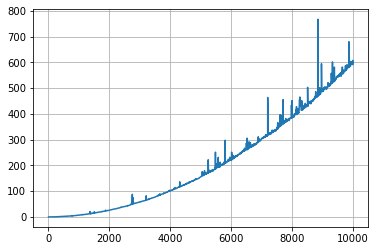

In [18]:
import time
import matplotlib.pyplot as plt 

def trace_reponse_temporelle(n:int):
    """ Prend l'entier n en paramètre.
        Cherche si n admet une décomposition en produit de facteurs premiers
        Si c'est le cas, les valeurs de n et le temps de calcul sont mémorisés
        Trace le graphique du temps de calcul en fonction de n
    """
    temps = []
    liste_n = []
    for i in range(n):
        temps_debut = time.time()
        if factoriser_premiers(i) != None:
            temps_fin = time.time()
            temps.append((temps_fin - temps_debut)*1000)
            liste_n.append(i)
    plt.plot(liste_n, temps) # trace le graphique
    plt.grid() # affiche la grille
    plt.show() # affiche le graphique

trace_reponse_temporelle(10000)


<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x2705; Correction</summary>
<code>
import time
import matplotlib.pyplot as plt 

def trace_reponse_temporelle(n:int):
    """ Prend l'entier n en paramètre.
        Cherche si n admet une décomposition en produit de facteurs premiers
        Si c'est le cas, les valeurs de n et le temps de calcul sont mémorisés
        Trace le graphique du temps de calcul en fonction de n
    """
    temps = []
    liste_n = []
    for i in range(n):
        temps_debut = time.time()
        if factoriser_premiers(i) != None:
            temps_fin = time.time()
            temps.append(temps_fin - temps_debut)
            liste_n.append(i)
    plt.plot(liste_n, temps) # trace le graphique
    plt.grid() # affiche la grille
    plt.show() # affiche le graphique

trace_reponse_temporelle(2000)
</code>
</details>

Il faudrait pousser plus loin la construction du graphique, avec une valeur de n plus grande, pour voir se dessiner une évolution franchement polynomiale ou exponentielle.  
Dans les faits, les dimensions des clefs sont suffisamment grandes pour rendre irréaliste la factorisation de n.

Une précondition sur les valeurs de $p$ et $q$ a été passée sous silence: Si $n$ est trop petit le chiffrement ne fonctionne plus. Faites des essais avec $p = 11$ et $q=13$. Si votre message comprend des caractères exotiques, ils ne passeront pas.

Les algorithmes présentés ici sont un peu "brutaux" pour simplifier l'approche.  
La listes des nombres premiers et systématiquement recalculée 😕.  
Pour plus d'efficacité, il faudrait faire appel à:  
- l'algorithme d'Euclide étendu pour optimiser le calcul des clefs
- l'exponentiation modulaire pour accélérer les calculs de puissance
- les crible d'Ératosthène ou d'Atkin pour trouver rapidement les nombres premiers  

Ces éléments, ainsi que les preuves mathématiques du fonctionnement de ce chiffrement sont présentés dans les sources "Pour aller beaucoup pus loin avec Exo7"

---
<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">- Eric Buonocore. avril 2021 -<br></p>

![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)

Sources:
- <a href="https://www.youtube.com/watch?v=7W7WPMX7arI">Cookie connecté: Comprendre le chiffrement SSL / TLS avec des emojis (et le HTTPS)</a> 9min33s
- <a href="https://www.youtube.com/watch?v=rO5aQzgKOs0">String Theory par Science4All: Hashage et empreintes cryptographiques - CRYPTO#05</a> 5min33s  
- David Louapre de Science étonnante :  
<a href="https://www.youtube.com/watch?v=z4tkHuWZbRA">Comment déchiffrer (presque) n'importe quel message codé ? 🔑🔓📜</a> 13min24s  
<a href="https://www.youtube.com/watch?v=8BM9LPDjOw0">Les codes secrets</a>  
- <a href="https://www.youtube.com/watch?v=Y2bsLRdVBP85min">String Theory par Science4All: La magie du protocole RSA -CRYPTO#12</a> 5min05s  
- <a href="https://interstices.info/les-livraisons-dangereuses/">Les livraisons dangereuses</a>  

- Pour aller plus loin:  
<a href="https://interstices.info/nombres-premiers-et-cryptologie-lalgorithme-rsa/">Interstices: Nombres premiers et cryptologie : l’algorithme RSA</a>  
<a href="http://villemin.gerard.free.fr/Crypto/RSA.htm">Gérard Villemin: Cryptologie</a>  

- Pour aller beaucoup pus loin avec Exo7:  
<a href="https://pod.univ-lille.fr/exo7/cryptographie/">Les vidéos du Mooc d'Exo7 sur la cryptographie</a>  
<a href="http://exo7.emath.fr/cours/livre-mooc-exo7.pdf"> Le livre d'Exo7 sur la cryptographie</a>  